### Data Cleaning

In [1]:
import pandas as pd

In [2]:
mbti_df = pd.read_csv('/Users/aungpao/Documents/Coding/MBTI_datavis/reddit_psychometric_data.csv')

In [3]:
print(f"This dataset has {mbti_df.shape[0]:,} entries\
and {mbti_df.shape[1]:,} rows")

This dataset has 3,586 entriesand 27,091 rows


In [4]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Columns: 27091 entries, mbti_type to comment_PIED
dtypes: int64(27090), object(1)
memory usage: 741.2+ MB


Too many column to extract, so I save it as txt

In [5]:
with open(r'/Users/aungpao/Documents/Coding/MBTI_datavis/allcolumns.txt', 'w') as fp:
    for item in mbti_df.columns.values.tolist():
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


### Data Exploration, Analysis and Visualisation

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
matplotlib.rcParams['agg.path.chunksize'] = 10000 # increased chunksize because 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

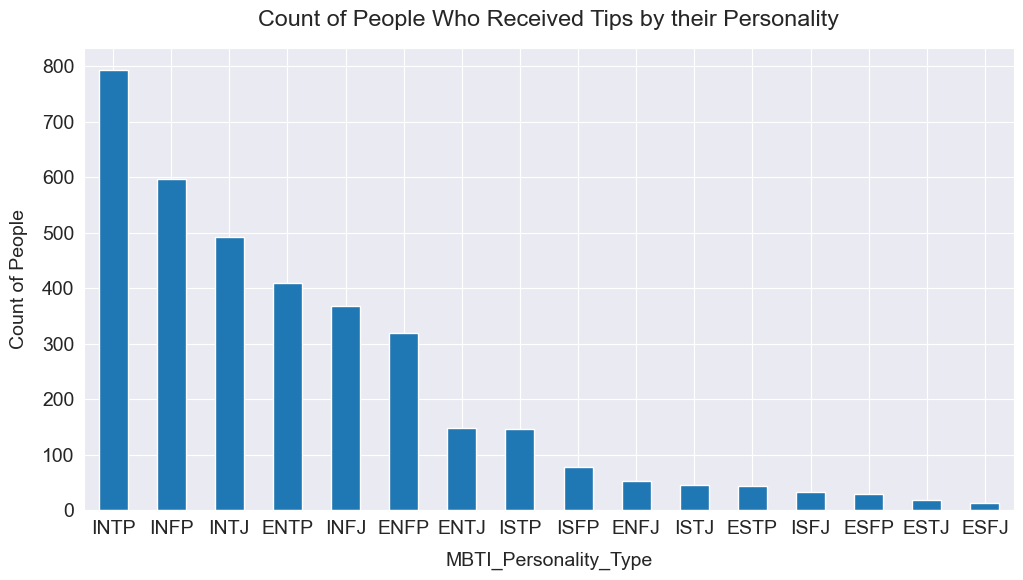

In [8]:
mbti_df['mbti_type'].value_counts().plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel("MBTI_Personality_Type", labelpad=10) #labelpad = distance between xlabel and graph
plt.ylabel("Count of People", labelpad=10) #labelpad = distance between ylabel and graph
plt.title("Count of People Who Received Tips by their Personality", y=1.03);

In [9]:
#create empty dataframe
df = pd.DataFrame()

In [10]:
datas = []
for col in mbti_df.columns.values.tolist():
    if col == 'mbti_type':
        pass
    else:
        data = [str(col), mbti_df[col].sum()]
        datas.append(data)
    
df = pd.DataFrame(datas, columns=['Name', 'Count'])

In [11]:
df

,Name,Count
0,post_AskRedditAfterDark,8
1,post_unpopularopinion,613
2,post_introvert,85
3,post_UnpopularFacts,2
4,post_changemyview,54
...,...,...
27085,comment_Actage,1
27086,comment_sariyerbelediyesi,3
27087,comment_Ben10,1
27088,comment_MKMemes,3


In [12]:
sorted_df = df.sort_values('Count', ascending=False)

In [13]:
sorted_df.head(10)

,Name,Count
13694,comment_mbti,39682
13754,comment_AskReddit,10329
13707,comment_mbtimemes,7344
13794,comment_INTP,7109
13726,comment_intj,6190
13716,comment_infp,5682
32,post_mbti,5260
13692,comment_entp,5198
13698,comment_memes,4873
13739,comment_ENFP,4061


In [14]:
post_df = mbti_df.filter(regex='^post_|^mbti_type') # ^ = start with
# create new dataframe
datas = []
for col in post_df.columns.values.tolist():
    if col == 'mbti_type':
        pass
    else:
        data = [str(col), mbti_df[col].sum()]
        datas.append(data)
    
sorted_post_df = pd.DataFrame(datas, columns=['Name', 'Count'])

In [15]:
sorted_post_df = sorted_post_df.sort_values('Count', ascending=False)
sorted_post_df.head(20)

,Name,Count
32,post_mbti,5260
29,post_AskReddit,2657
103,post_memes,2220
55,post_infp,2022
119,post_INTP,1882
132,post_teenagers,1368
50,post_mbtimemes,1367
528,post_dankmemes,1290
51,post_ENFP,935
503,post_intj,910


Top 5 post where MBTI is not related: 'post_AskReddit', 'post_memes', 'post_teenagers','post_dankmemes', 'post_showerthoughts'

In [16]:
non_mbti_post = ['post_AskReddit', 'post_memes', 'post_teenagers','post_dankmemes', 'post_Showerthoughts']

In [17]:
mbti_df[['mbti_type','post_AskReddit']]

,mbti_type,post_AskReddit
0,INTP,2
1,ENTP,0
2,INFJ,0
3,INFP,0
4,ENTP,0
...,...,...
3581,INTP,0
3582,ENFP,0
3583,INTP,0
3584,INTP,0


In [18]:
mbti_df[mbti_df['mbti_type'].str.contains("INTP")][['mbti_type',non_mbti_post[0]]].post_AskReddit.sum()

566

In [89]:
def showdf(MBTI, INDEX, type):
    if type == 'p':
        return mbti_df[mbti_df['mbti_type'].str.contains(MBTI)][['mbti_type',non_mbti_post[INDEX]]]
    elif type == 'c':
        return mbti_df[mbti_df['mbti_type'].str.contains(MBTI)][['mbti_type',non_mbti_comment[INDEX]]]
    else:
        print("type = 'p' or 'c'")

In [21]:
mbtis= [
    'ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP',
    'INFJ','INFP','INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ','ISTP'
]

In [25]:
import numpy as np

In [38]:
sorted_comment_df = sorted_comment_df.sort_values('Count', ascending=False)
sorted_comment_df.head(20)

,Name,Count
8,comment_mbti,39682
68,comment_AskReddit,10329
21,comment_mbtimemes,7344
108,comment_INTP,7109
40,comment_intj,6190
30,comment_infp,5682
6,comment_entp,5198
12,comment_memes,4873
53,comment_ENFP,4061
25,comment_infj,3575


**Top 5 Comments (Non-MBTI related)**
- comment_AskReddit	10329
- comment_memes	4873
- comment_PoliticalCompassMemes	3441
- comment_teenagers	3065
- comment_Enneagram	2355
- comment_unpopularopinion	1835
- comment_dankmemes	1724


In [39]:
sorted_comment_df[sorted_comment_df['Name'].str.contains("comment_Showerthoughts")]

,Name,Count
33,comment_Showerthoughts,636


In [86]:
non_mbti_comment = ['comment_AskReddit', 'comment_memes', 'comment_teenagers','comment_dankmemes', 'comment_Showerthoughts']

In [90]:
# this line work but it has a better way to make the code more clean
datas = []
for mbti in mbtis:
    each_data=[mbti]
    for i in range(5):
        if i == 0:
            total = showdf(mbti, i,'c').comment_AskReddit.sum()
            each_data.append(total)
        elif i == 1:
            total = showdf(mbti, i,'c').comment_memes.sum()
            each_data.append(total)
        elif i == 2:
            total = showdf(mbti, i,'c').comment_teenagers.sum()
            each_data.append(total)
        elif i == 3:
            total = showdf(mbti, i,'c').comment_dankmemes.sum()
            each_data.append(total)
        elif i ==4:
            total = showdf(mbti, i,'c').comment_Showerthoughts.sum()
            each_data.append(total)
        else:
            print('Unknow index found. Stop looping')
    datas.append(each_data)

print(datas)

[['ENFJ', 181, 39, 17, 48, 2], ['ENFP', 971, 428, 271, 105, 45], ['ENTJ', 317, 123, 176, 85, 19], ['ENTP', 1034, 591, 522, 227, 70], ['ESFJ', 16, 19, 0, 0, 0], ['ESFP', 51, 36, 2, 6, 0], ['ESTJ', 22, 21, 1, 2, 17], ['ESTP', 163, 51, 49, 26, 9], ['INFJ', 1189, 571, 189, 188, 87], ['INFP', 1777, 547, 443, 208, 52], ['INTJ', 1551, 661, 302, 195, 102], ['INTP', 2440, 1479, 840, 499, 185], ['ISFJ', 130, 30, 22, 6, 10], ['ISFP', 158, 53, 18, 16, 5], ['ISTJ', 70, 15, 13, 7, 4], ['ISTP', 259, 209, 200, 106, 29]]


In [91]:
my_work_comment = pd.DataFrame(datas, columns=['mbti_type']+non_mbti_comment) #insert 'mbti_type' in front of the list
my_work_comment

,mbti_type,comment_AskReddit,comment_memes,comment_teenagers,comment_dankmemes,comment_Showerthoughts
0,ENFJ,181,39,17,48,2
1,ENFP,971,428,271,105,45
2,ENTJ,317,123,176,85,19
3,ENTP,1034,591,522,227,70
4,ESFJ,16,19,0,0,0
5,ESFP,51,36,2,6,0
6,ESTJ,22,21,1,2,17
7,ESTP,163,51,49,26,9
8,INFJ,1189,571,189,188,87
9,INFP,1777,547,443,208,52


### Make new dataframe for INTROVERT and EXTROVERT

In [95]:
my_work_comment.head(8).sum(axis=0)

mbti_type                 ENFJENFPENTJENTPESFJESFPESTJESTP
comment_AskReddit                                     2755
comment_memes                                         1308
comment_teenagers                                     1038
comment_dankmemes                                      499
comment_Showerthoughts                                 162
dtype: object

In [99]:
my_work_comment[8:].sum(axis=0)

mbti_type                 INFJINFPINTJINTPISFJISFPISTJISTP
comment_AskReddit                                     7574
comment_memes                                         3565
comment_teenagers                                     2027
comment_dankmemes                                     1225
comment_Showerthoughts                                 474
dtype: object

Comment for `post_AskReddit	post_memes	post_teenagers	post_dankmemes	post_Showerthoughts`

In [40]:
comment = [10329, 4873, 3065, 1724, 636]

In [41]:
non_mbti_post

['post_AskReddit',
 'post_memes',
 'post_teenagers',
 'post_dankmemes',
 'post_Showerthoughts']

In [100]:
ex_post = [837,627,495,369,192]
in_post = [1820,1593,873,921,552]
ex_comm = [2755,1308,1038,499,162]
in_comm = [7574,3565,2027,1225,474]

In [118]:
#create empty dataframe
data = {
    'mbti': ['Introvert']*5 + ['Extrovert']*5,
    'post': in_post+ex_post,
    'comm': in_comm+ ex_comm
}

df = pd.DataFrame(data)
df

,mbti,post,comm
0,Introvert,1820,7574
1,Introvert,1593,3565
2,Introvert,873,2027
3,Introvert,921,1225
4,Introvert,552,474
5,Extrovert,837,2755
6,Extrovert,627,1308
7,Extrovert,495,1038
8,Extrovert,369,499
9,Extrovert,192,162


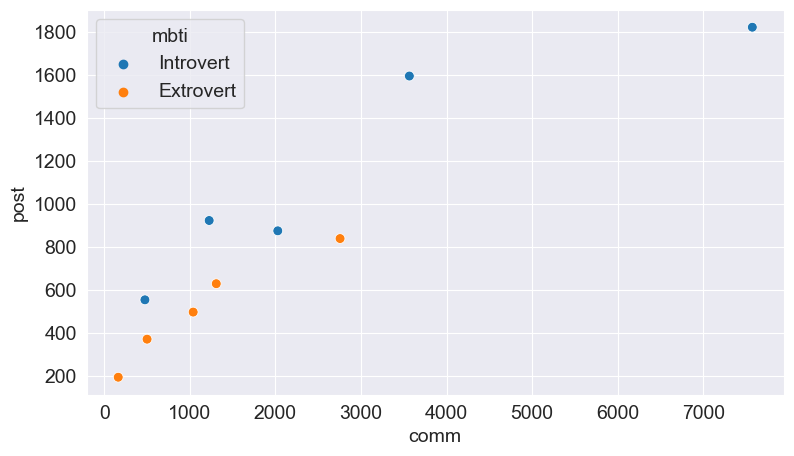

In [121]:
sns.scatterplot(
    x=df.comm, 
    y=df.post, 
    hue=df.mbti, 
    s=50
);